In [1]:
from models.black_scholes import BlackScholes
from models.monte_carlo import MonteCarlo
from models.heston import Heston
from calibration import Calibration
from visualization.graphics import Graphics
import datetime as dt
import pandas as pd

In [2]:
ticker = '^SPX'
end  = dt.datetime.now()
start = end - dt.timedelta(days=180) # 180 days is common when you consider the volatility constant
calibration = Calibration(ticker, start, end)

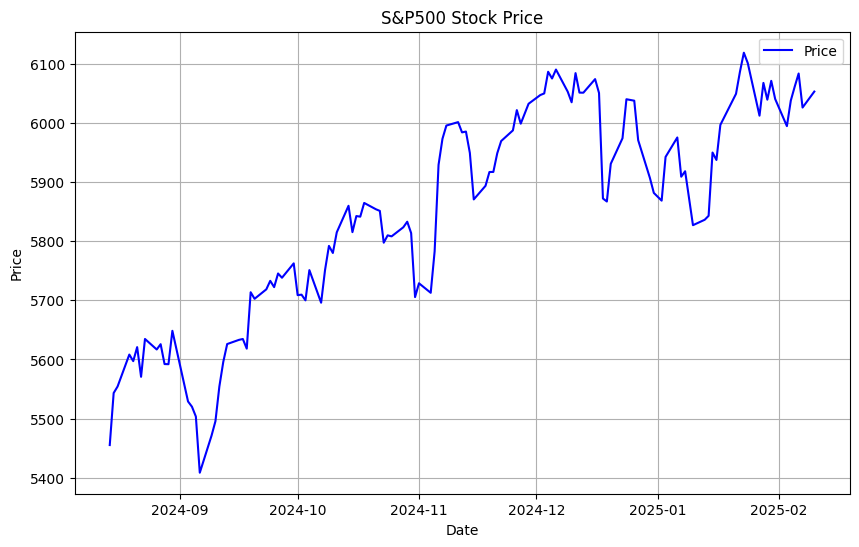

In [3]:
spx_historical_prices = calibration.get_historical_prices_df()
# Initialize Graphics class
graphics = Graphics()
# Plot stock chart
graphics.plot_stock_chart(spx_historical_prices, 'S&P500')

In [4]:
S0 = calibration.get_latest_price()
S0 # Current price of the underlying asset

6053.0098

In [5]:
K = S0 # Strike price
T = 1  # Time to maturity (1 year)

In [6]:
hist_mu = calibration.get_historical_mu()
hist_sigma = calibration.get_historical_sigma()
r = calibration.get_risk_free_rate()
print(f"Historical mu: {hist_mu}, Historical sigma: {hist_sigma}, Risk free rate: {r}")

Historical mu: 0.0086, Historical sigma: 0.1281, Risk free rate: 0.0423


---

# Monte Carlo

In [7]:
confidence_level = 0.99  # Confidence level
n_simul = 50000  # Number of simulations

# Example usage of MonteCarlo
mc = MonteCarlo(S_0=S0, K=K, T=T, mu=hist_mu, sigma=hist_sigma, option_type="C")
option_price_mc = mc.get_option_price()
print(f"Monte Carlo Option Price: {option_price_mc}")

Monte Carlo Option Price: 331.994471265944


---

# Black-Scholes-Merton

In [8]:
# Example usage of BlackScholes
bs = BlackScholes(r=r, S=S0, K=K, T=T, sigma=hist_sigma, option_type="C")
option_price = bs.calculate_option_price()
print(f"Black-Scholes Option Price: {option_price}")

Black-Scholes Option Price: 444.4049421308191


---


# Heston

In [9]:
# Load the calibrated parameters from the CSV file
params_df = pd.read_csv("data/heston_calibrated_parameters.csv")

# Extract the parameters
v0 = params_df["v0"].iloc[0]
kappa = params_df["kappa"].iloc[0]
theta = params_df["theta"].iloc[0]
sigma = params_df["sigma"].iloc[0]
rho = params_df["rho"].iloc[0]
lambd = params_df["lambd"].iloc[0]
#calibration_date = params_df["calibration_date"].iloc[0]

In [10]:
v0, kappa, theta, sigma, rho, lambd

(0.2133902971355713, 4.574961397035306, 0.001, 2.0, -0.254361338282851, 1.0)

In [11]:
heston = Heston(S0=S0, K=K, r=r, T=T, option_type="C",
                      v0=v0, kappa=kappa, theta=theta, sigma=sigma, rho=rho, lambd=lambd)
option_price = heston.calculate_option_price()
print(f"Heston Option Price: {option_price}")

Heston Option Price: 594.9847123970544
